In [3]:
import cv2

# Open the webcam (0 = default webcam)
cap = cv2.VideoCapture(0)

# Read one frame
ret, frame = cap.read()

# Release the webcam
cap.release()

# Save the image
cv2.imwrite("captured_image.jpg", frame)


True

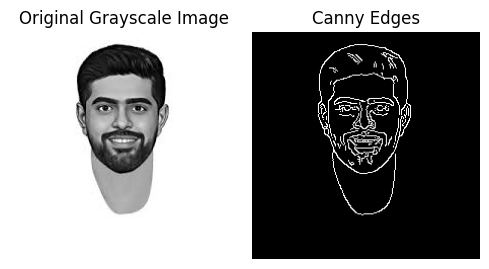

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('babarface.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Canny Edge Detection
edges = cv2.Canny(img, threshold1=100, threshold2=200)

# Display original and edges side by side
plt.figure(figsize=(5, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.tight_layout()
plt.show()


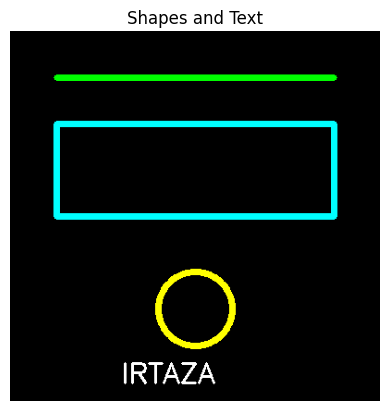

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a blank black image
img = np.zeros((400, 400, 3), dtype=np.uint8)

# Draw a line (image, start_point, end_point, color, thickness)
cv2.line(img, (50, 50), (350, 50), (0, 255, 0), 5)

# Draw a rectangle (top-left, bottom-right)
cv2.rectangle(img, (50, 100), (350, 200), (255, 255, 0), 5)

# Draw a filled circle (center, radius, color, -1 for fill)
cv2.circle(img, (200, 300), 40, (0, 255 ,255), 5)

# Put text (image, text, position, font, font_scale, color, thickness)
cv2.putText(img, 'IRTAZA', (120, 380), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Shapes and Text')
plt.show()


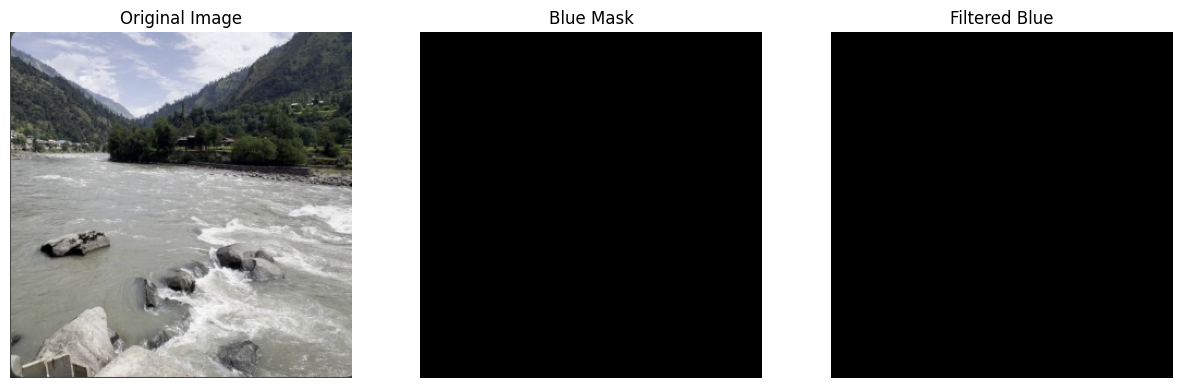

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('nature.png')

# Convert BGR to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define lower and upper range for blue color
lower_skin = np.array([120, 100, 100])
upper_skin = np.array([121, 255, 255])


# Create a mask: only where blue is detected
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Apply mask to original image
result = cv2.bitwise_and(img, img, mask=mask)

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Show original, mask, and result
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Blue Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(result_rgb)
plt.title("Filtered Blue")
plt.axis('off')

plt.show()


In [25]:
import cv2

# Load the face detector xml file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


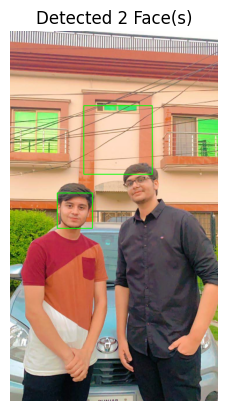

In [28]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("2face.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=6)

# Draw rectangles on original image
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Convert to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show result
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Detected {len(faces)} Face(s)")
plt.show()


In [41]:
import cv2
import matplotlib.pyplot as plt

# Load model
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# Load image
img = cv2.imread("group.jpg")
h, w = img.shape[:2]

# Convert image to blob (for the DNN)
blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))

# Pass the blob through the network
net.setInput(blob)
detections = net.forward()


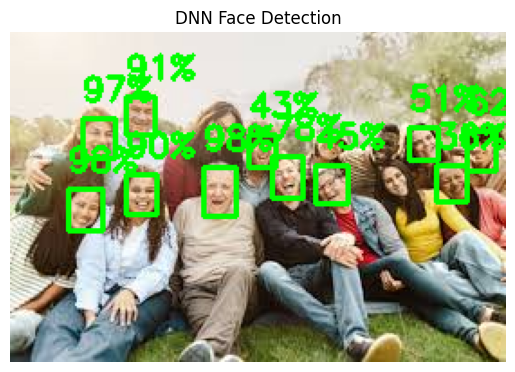

In [43]:
# Loop through detections
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    # Filter weak detections
    if confidence > 0.3:
        box = detections[0, 0, i, 3:7] * [w, h, w, h]
        (x1, y1, x2, y2) = box.astype(int)

        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"{int(confidence*100)}%", (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Convert to RGB and show
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("DNN Face Detection")
plt.show()


In [48]:
!pip install pytesseract


In [1]:
import pytesseract


In [6]:
import numpy as np
import matplotlib as plt

In [24]:
import cv2
import numpy as np

# Start the camera
cap = cv2.VideoCapture(0)

# Define color ranges in HSV
color_ranges = {
    'Red':    ([0, 120, 100],    [10, 255, 255]),
    'Green':  ([40, 70, 70],     [80, 255, 255]),
    'Blue':   ([90, 100, 100],   [130, 255, 255]),

}

# Assign unique colors for drawing
drawing_colors = {
    'Red':   (0, 0, 255),
    'Green': (0, 255, 0),
    'Blue':  (255, 0, 0),
   
}

while True:
    ret, frame = cap.read()
    if not ret:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    for color_name, (lower, upper) in color_ranges.items():
        lower_np = np.array(lower, dtype=np.uint8)
        upper_np = np.array(upper, dtype=np.uint8)

        mask = cv2.inRange(hsv, lower_np, upper_np)
        mask = cv2.dilate(mask, np.ones((5, 5), np.uint8))

        # Bitwise operation to isolate the color
        result = cv2.bitwise_and(frame, frame, mask=mask)

        # Find contours for each color
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 300:
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(frame, (x, y), (x + w, y + h), drawing_colors[color_name], 2)
                cv2.putText(frame, f"{color_name}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, drawing_colors[color_name], 2)

    cv2.imshow("Color Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [16]:
import cv2

In [17]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalfacedefault.xml')

In [19]:
cap = cv2.VideoCapture(0)

In [23]:
import cv2

cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, img = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 4)

    cv2.imshow('image', img)

    if cv2.waitKey(30) & 0xff == 27:  # ESC key to break
        break

cap.release()
cv2.destroyAllWindows()


In [23]:
import cv2

# Initialize webcam
cap = cv2.VideoCapture(0)

# Load pre-trained Haar cascades
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face_roi_gray = gray[y:y + h, x:x + w]
        face_roi_color = frame[y:y + h, x:x + w]

        # Draw face rectangle
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(frame, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        # Detect smiles inside face ROI
        smiles = smile_cascade.detectMultiScale(face_roi_gray, scaleFactor=1.8, minNeighbors=20)

        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(face_roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 2)
            cv2.putText(frame, "Smile", (x, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            break  # show only one smile box per face

    cv2.imshow("Smile Detection", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC to quit
        break

cap.release()
cv2.destroyAllWindows()


In [35]:
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [1]:
pip install numpy 


Note: you may need to restart the kernel to use updated packages.


In [4]:
import easyocr

In [6]:
# Create the reader object
reader = easyocr.Reader(['en'])  # ✅ Correct: 'Reader' is capitalized

# Read text from image
result = reader.readtext('car.jpg')  # ✅ Also corrected: use `reader.readtext`, not `Reader.readText`

# Print the results
print(result)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

C:\Users\LaptopClub\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(135), np.int32(49)], [np.int32(215), np.int32(49)], [np.int32(215), np.int32(67)], [np.int32(135), np.int32(67)]], 'TN 48AD 6522', np.float64(0.73355075005659))]


In [10]:
import easyocr

# Create the reader object
reader = easyocr.Reader(['en'])  # ✅ Correct: 'Reader' is capitalized

# Read text from image
result = reader.readtext('car.jpg')  # ✅ Also corrected: use `reader.readtext`, not `Reader.readText`

# Print the results
print(result)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[np.int32(135), np.int32(49)], [np.int32(215), np.int32(49)], [np.int32(215), np.int32(67)], [np.int32(135), np.int32(67)]], 'TN 48AD 6522', np.float64(0.73355075005659))]


C:\Users\LaptopClub\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


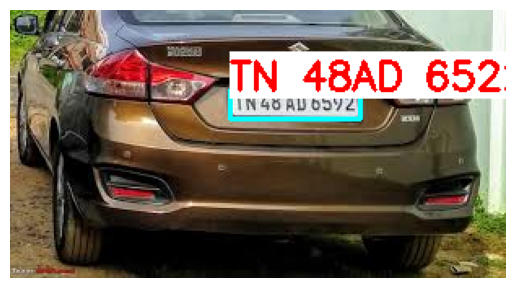

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Prediction result
result = [([[135, 49], [215, 49], [215, 67], [135, 67]], 'TN 48AD 6522', 0.73)]

# Load image
image_path = "car.jpg"
img = cv2.imread(image_path)

# Draw predictions
for box, text, score in result:
    box = [tuple(pt) for pt in box]

    # Draw bounding box
    cv2.polylines(img, [np.array(box)], isClosed=True, color=(255, 255, 0), thickness=2)

    # Adjust position for text
    top_left = box[0]
    x, y = top_left
    font_scale = 0.8
    thickness = 2

    # OPTIONAL: Draw background rectangle for better readability
    (w, h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    cv2.rectangle(img, (x, y - h - 5), (x + w, y + 5), (255, 255, 255), -1)  # white bg

    # Draw text
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 255), thickness)

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [21]:
import cv2
import os
import numpy as np
from PIL import Image

def create_user(f_id, name):
    # Initialize webcam
    cam = cv2.VideoCapture(0)
    cam.set(3, 640)  # width
    cam.set(4, 480)  # height

    # Load Haar cascade
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Create dataset directory
    dataset_dir = 'dataset'
    if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)

    user_folder = os.path.join(dataset_dir, name + "_" + str(f_id))
    if not os.path.exists(user_folder):
        os.makedirs(user_folder)

    print("\n[INFO] Initializing face capture. Look at the camera...")

    count = 0
    while True:
        ret, img = cam.read()
        if not ret:
            print("[ERROR] Failed to grab frame")
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_detector.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            count += 1
            face_img = gray[y:y+h, x:x+w]
            file_path = os.path.join(user_folder, f"{str(count)}.jpg")
            cv2.imwrite(file_path, face_img)

            # Display live capture
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            cv2.imshow('image', img)

        k = cv2.waitKey(100) & 0xff
        if k == 27:  # press ESC to exit
            break
        elif count >= 30:
            break

    print(f"\n[INFO] Collected {count} face images for {name}")
    cam.release()
    cv2.destroyAllWindows()


In [1]:
import cv2
import os
import numpy as np
from PIL import Image

def train_model():
    dataset_path = 'dataset'
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Get images and labels
    def get_images_and_labels(path):
        face_samples = []
        ids = []
        names = []
        label_map = {}

        for i, folder_name in enumerate(os.listdir(path)):
            folder_path = os.path.join(path, folder_name)
            if not os.path.isdir(folder_path):
                continue
            label_map[i] = folder_name
            for image_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, image_name)
                pil_img = Image.open(img_path).convert('L')  # grayscale
                img_np = np.array(pil_img, 'uint8')
                faces = detector.detectMultiScale(img_np)
                for (x, y, w, h) in faces:
                    face_samples.append(img_np[y:y+h, x:x+w])
                    ids.append(i)
        return face_samples, ids, label_map

    print("\n[INFO] Training faces. It will take a few seconds...")
    faces, ids, label_map = get_images_and_labels(dataset_path)
    recognizer.train(faces, np.array(ids))

    recognizer.write('trainer.yml')  # Save the model
    np.save('label_map.npy', label_map)  # Save the mapping of label to name

    print(f"[INFO] {len(np.unique(ids))} faces trained. Model saved.")

train_model()



[INFO] Training faces. It will take a few seconds...


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'dataset'

In [13]:
import cv2
import numpy as np
import os
from PIL import Image


In [14]:
import cv2
import numpy as np
import os

def create_user(f_id, name):
    web = cv2.VideoCapture(0)
    web.set(3, 640)
    web.set(4, 480)

    # Load Haar cascade
    faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Create dataset directory
    dataset_dir = 'D:/opencv/dataset'
    user_path = os.path.join(dataset_dir, name)
    os.makedirs(user_path, exist_ok=True)

    counter = 0
    while True:
        ret, img = web.read()
        if not ret:
            print("Failed to grab frame")
            break

        img = cv2.flip(img, 1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        multi_face = faces.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in multi_face:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            counter += 1

            face_img = gray[y:y+h, x:x+w]
            cv2.imwrite("{}/{}.{}.{}.jpg".format(user_path, name, f_id, counter), face_img)

            cv2.imshow("Capturing Faces", img)

        # Exit conditions
        k = cv2.waitKey(100) & 0xff
        if k == 27:  # Press 'ESC' to exit early
            break
        elif counter >= 40:
            break

    web.release()
    cv2.destroyAllWindows()


In [15]:
create_user(1,"mycoding")

In [19]:
import cv2
import os
import numpy as np
from PIL import Image

def train():
    database = 'dataset'
    
    # Get all user directories (each contains images of one person)
    img_dirs = [x[0] for x in os.walk(database)][1:]

    # Create face recognizer and face detector
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    detector = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    faceSamples = []
    ids = []

    for path in img_dirs:
        imagePaths = [os.path.join(path, f) for f in os.listdir(path)]

        for imagePath in imagePaths:
            PIL_img = Image.open(imagePath).convert('L')  # Convert to grayscale
            img_numpy = np.array(PIL_img, 'uint8')

            try:
                id = int(os.path.split(imagePath)[-1].split('.')[1])
            except:
                print(f"Skipping file (invalid name): {imagePath}")
                continue

            faces = detector.detectMultiScale(img_numpy)

            for (x, y, w, h) in faces:
                faceSamples.append(img_numpy[y:y+h, x:x+w])
                ids.append(id)

    # Train and save the model
    recognizer.train(faceSamples, np.array(ids))
    recognizer.write('trainer.yml')

    print(f"\n[INFO] {len(np.unique(ids))} faces trained. Exiting Program.")
    return len(np.unique(ids))


In [20]:
train()


[INFO] 1 faces trained. Exiting Program.


1

In [24]:
def recognize(names):
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read('trainer.yml')
    
    cascadePath = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
    faceCascade = cv2.CascadeClassifier(cascadePath)

    font = cv2.FONT_HERSHEY_SIMPLEX
    id = 0
    name = ''
    face_count = 0

    cam = cv2.VideoCapture(0)
    cam.set(3, 640)  # width
    cam.set(4, 480)  # height

    minW = 0.1 * cam.get(3)
    minH = 0.1 * cam.get(4)

    while True:
        ret, img = cam.read()
        img = cv2.flip(img, 1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(int(minW), int(minH)))

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            id_, confidence = recognizer.predict(gray[y:y+h, x:x+w])
            
            if confidence < 100:
                name = names.get(id_, "Unknown")
                confidence_txt = f"{round(100 - confidence)}%"
            else:
                name = "Unknown"
                confidence_txt = f"{round(100 - confidence)}%"

            cv2.putText(img, str(name), (x+5, y-5), font, 1, (255,255,255), 2)
            cv2.putText(img, str(confidence_txt), (x+5, y+h-5), font, 1, (255,255,0), 1)

        cv2.imshow('camera', img)
        k = cv2.waitKey(10) & 0xff
        if k == 27:
            break

    print("\n[INFO] Exiting Program and cleanup stuff")
    cam.release()
    cv2.destroyAllWindows()


In [25]:
recognize({1:"mycoding"})



[INFO] Exiting Program and cleanup stuff
